In [184]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.datasets import load_iris

<h2>LogisticRegression</h2>

In [187]:
iris=load_iris(as_frame=True)

In [189]:
df=iris.frame

In [191]:
df.shape

(150, 5)

In [193]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [195]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [197]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [199]:
df['target'].unique()

array([0, 1, 2])

In [201]:
df['target_names']=df['target'].apply(lambda x: 'setosa' if x==0 else('versicolor' if x==1 else 'virginica'))

In [203]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [205]:
df['target'].unique()

array([0, 1, 2])

In [207]:
df['target_names'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Data visualization

In [210]:
# visulization bw sepal length and sepal width

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

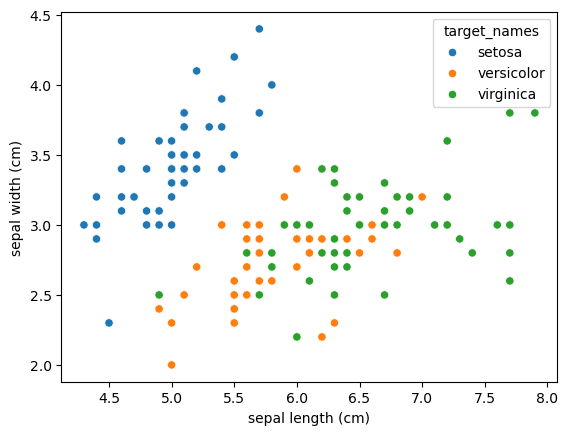

In [212]:
sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'], hue=df['target_names'])

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

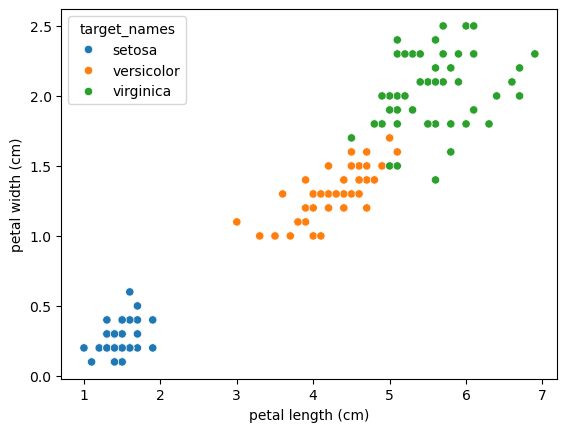

In [214]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'], hue=df['target_names'])

### model training

In [217]:
X=df.drop(['target','target_names'],axis=1)
y=df['target_names']

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [221]:
X.shape

(150, 4)

In [223]:
X_train.shape

(105, 4)

In [225]:
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

### Model Evaluation : Accuracy,Recall,Precision,F1_score,confusion_matrix

In [237]:
model.score(X_test,y_test)

1.0

In [243]:
accuracy_score(y_test,y_pred)

1.0

In [247]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [249]:
cm=confusion_matrix(y_test,y_pred)

In [251]:
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

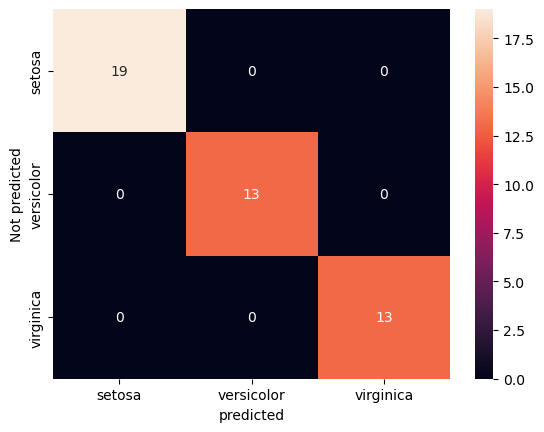

In [257]:
sns.heatmap(cm,xticklabels=iris.target_names,yticklabels=iris.target_names,annot=True)
plt.xlabel('predicted')
plt.ylabel('Not predicted')
plt.show()